# Task 1: Bulk RNA-seq data analysis
## Notebook 1: Functional Analysis


Comparative & Regulatory Genomics - [I0U29a] | Task 1 - Bulk RNA-seq data analysis | Antoine Ruzette <b> r0829308 </b> | 19.12.2021

Based on the Functional Analysis jupyter notebook from Prof. Stein Aerts. 


In this session we will analyze the differentially expressed genes found by DESeq2 on the bulk RNA-seq data, for the MD1 treatment case study. Two replicates of Control RNA-seq samples were compared with 2 replicates of Treated (MB1) RNA-seq samples. 


In [1]:
cd /mnt/storage/$USER/jupyternotebooks/Assignment

In [2]:
head deseq.results.tsv #after adding the gene header

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
TRIB3	36600.4315336803	2.48543044630668	0.0779717448011289	31.8760398737505	5.73672780705973e-223	8.85291835185458e-219
KLHL24	4847.29869700644	3.36267305287895	0.108147118045263	31.0935058988031	2.94810669591521e-212	2.27475912656818e-208
ERN1	4078.53023433434	3.19018707375091	0.111268272060618	28.6711298258763	8.74222058199542e-181	4.49699826737844e-177
PRDX1	12871.2138298292	-2.29527402989532	0.0873532569253344	-26.275769338025	3.62924718207223e-152	1.40016356284347e-148
LDHA	29688.6605252198	-2.04844635849026	0.0803278966631278	-25.5010580829828	1.91869151240064e-143	5.92184948387334e-140
HSP90AA1	77235.8493647543	-1.82642127714815	0.0769458400434572	-23.7364524984928	1.51648105474126e-124	3.90038927279452e-121
SLC29A1	3476.07909094131	-2.73231668984512	0.115908350591616	-23.5730788670437	7.28090068861297e-123	1.60512656323822e-119
UNG	3345.62774657242	-2.58162562513548	0.110905024128664	-23.2778059012049	7.44065274596934e-120	1.4

In [82]:
head -1 deseq.results.tsv
grep -n SESN2 deseq.results.tsv
grep -n SESN3 deseq.results.tsv
grep -n RNF152 deseq.results.tsv
grep -n FNIP1 deseq.results.tsv
grep -n RRAGD deseq.results.tsv

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
569:SESN2	3300.76375790605	1.17287236809096	0.12848621513228	9.12839067508883	6.95250818634885e-20	1.88892792837562e-18
3716:SESN3	17.0386956857199	4.95373737025232	1.47874658384575	3.34995693269446	0.000808241260002863	0.00335741026227838
2081:RNF152	194.119883775655	2.10086818272997	0.413289928450142	5.08327940777152	3.70973364127672e-07	2.75233699770108e-06
516:FNIP1	1930.33007204913	1.24242266804123	0.13127196415632	9.46449362608557	2.94986835668341e-21	8.83929485055113e-20
1283:RRAGD	1456.7014491063	0.983690212197364	0.149981743183038	6.55873302523804	5.42668562486674e-11	6.53234107355254e-10


Some of the target genes are strongly up-regulated (logFC > 2, SESN3 and RNF152) and all of them have a p.adj << 0.05. 

## Use arbitrary thresholds to create lists of up- and down-regulated genes
* careful: there are a lot of genes without detected expression, they have NA in the logFC column; so column 3 ($3) should not be "NA" 
* we're using awk to filter this file, selecting only rows where the logFC (column 3, indicated by "\$3") is higher than a threshold; and the padj is lower than a threshold
* print ; => prints all the columns of the rows that fulfill our requirements

In [8]:
#for upregulated genes
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print ;}' deseq.results.tsv | head

TRIB3	36600.4315336803	2.48543044630668	0.0779717448011289	31.8760398737505	5.73672780705973e-223	8.85291835185458e-219
KLHL24	4847.29869700644	3.36267305287895	0.108147118045263	31.0935058988031	2.94810669591521e-212	2.27475912656818e-208
ERN1	4078.53023433434	3.19018707375091	0.111268272060618	28.6711298258763	8.74222058199542e-181	4.49699826737844e-177
CCNG2	4124.3175609276	2.65598509930236	0.126142852841655	21.0553752310991	2.04160392227355e-98	2.25043083775181e-95
GAB2	14599.4239512536	1.81376286161911	0.0873797771817557	20.7572383464239	1.05455403953301e-95	9.57286937533731e-93
BCL6	1194.4266594512	3.59181275019564	0.177026184906727	20.2897257944531	1.58476562930854e-91	1.16457634245188e-88
BTG1	5550.2127505016	1.91939019607031	0.0956493633455828	20.0669416808926	1.43571908292966e-89	1.00709167671684e-86
CREBRF	1836.08082937412	2.89655823362226	0.14944761567109	19.3817627709573	1.10013203569986e-83	7.38140764126968e-81
JHDM1D	4081.27742031124	2.10136844400433	0.114253320688849	18

Now print only the first column with the gene names (either up- or down- regulated) and sent it to an output file. Additionaly, the number of genes is printed in the standard output:

In [69]:
#upregulated genes
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print $1}' deseq.results.tsv | head
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print $1}' deseq.results.tsv > up-logFC1-p05.txt
wc -l up-logFC1-p05.txt
#downregulated genes
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' deseq.results.tsv | head
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' deseq.results.tsv > down-logFC1-p05.txt
wc -l down-logFC1-p05.txt

TRIB3
KLHL24
ERN1
CCNG2
GAB2
BCL6
BTG1
CREBRF
JHDM1D
IRS1
PRDX1
LDHA
HSP90AA1
SLC29A1
UNG
MCM4
SEMA7A
PAICS
PKM
ODC1
732 up-logFC1-p05.txt
914 down-logFC1-p05.txt


In [8]:
grep -n RRAGD up-logFC1-p05.txt
grep -n FNIP1 up-logFC1-p05.txt
grep -n SESN2 up-logFC1-p05.txt
grep -n SESN3 up-logFC1-p05.txt
grep -n RNF152 up-logFC1-p05.txt

129:FNIP1
142:SESN2
513:SESN3
359:RNF152


: 1

Note that 732 genes were considered as upregulated while 914 as downregulated. The two amounts are higher than the ones that were found in the analysis of the related paper. 

Due to the cutoff of log2FC > 1,  RRAGD is not considered as upregulated with its log2FC value of 0.98 and therefore is not in the list. 

From the related paper: 
<i>"These analyses revealed that MB1-47 results in 635 significantly downregulatedand 414 significantly upregulated genes (fold change.2 and adjustedP, .0001 cutoffs; supplemental Table 1)."</i> 

Note that the cutoff used for the adjusted p-values we used is not the same as in the paper, namely 0.05 versus 0.0001 in the paper. If we were to use a cutoff of 0.0001, then 400 genes are upregulated and 679 are downregulated. This is similar to the paper, which indicates that the four libraries approximate correctly the six libraries generated in the experiment. 

## Humanmine.org

Create a new list on humanmine.org, then click "Save List of N genes": 

For upregulated genes list: 

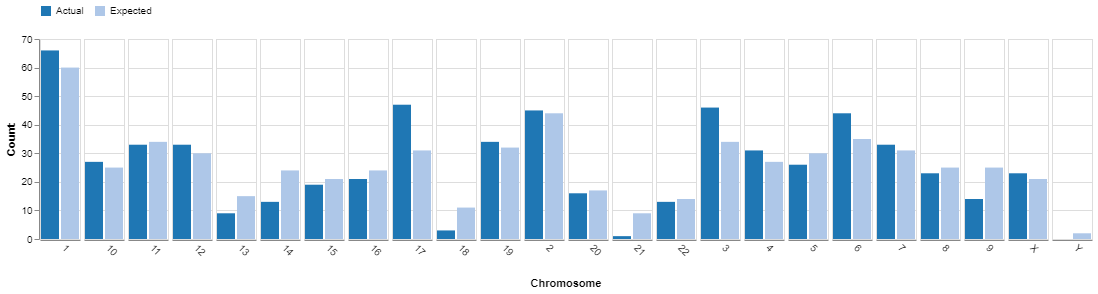

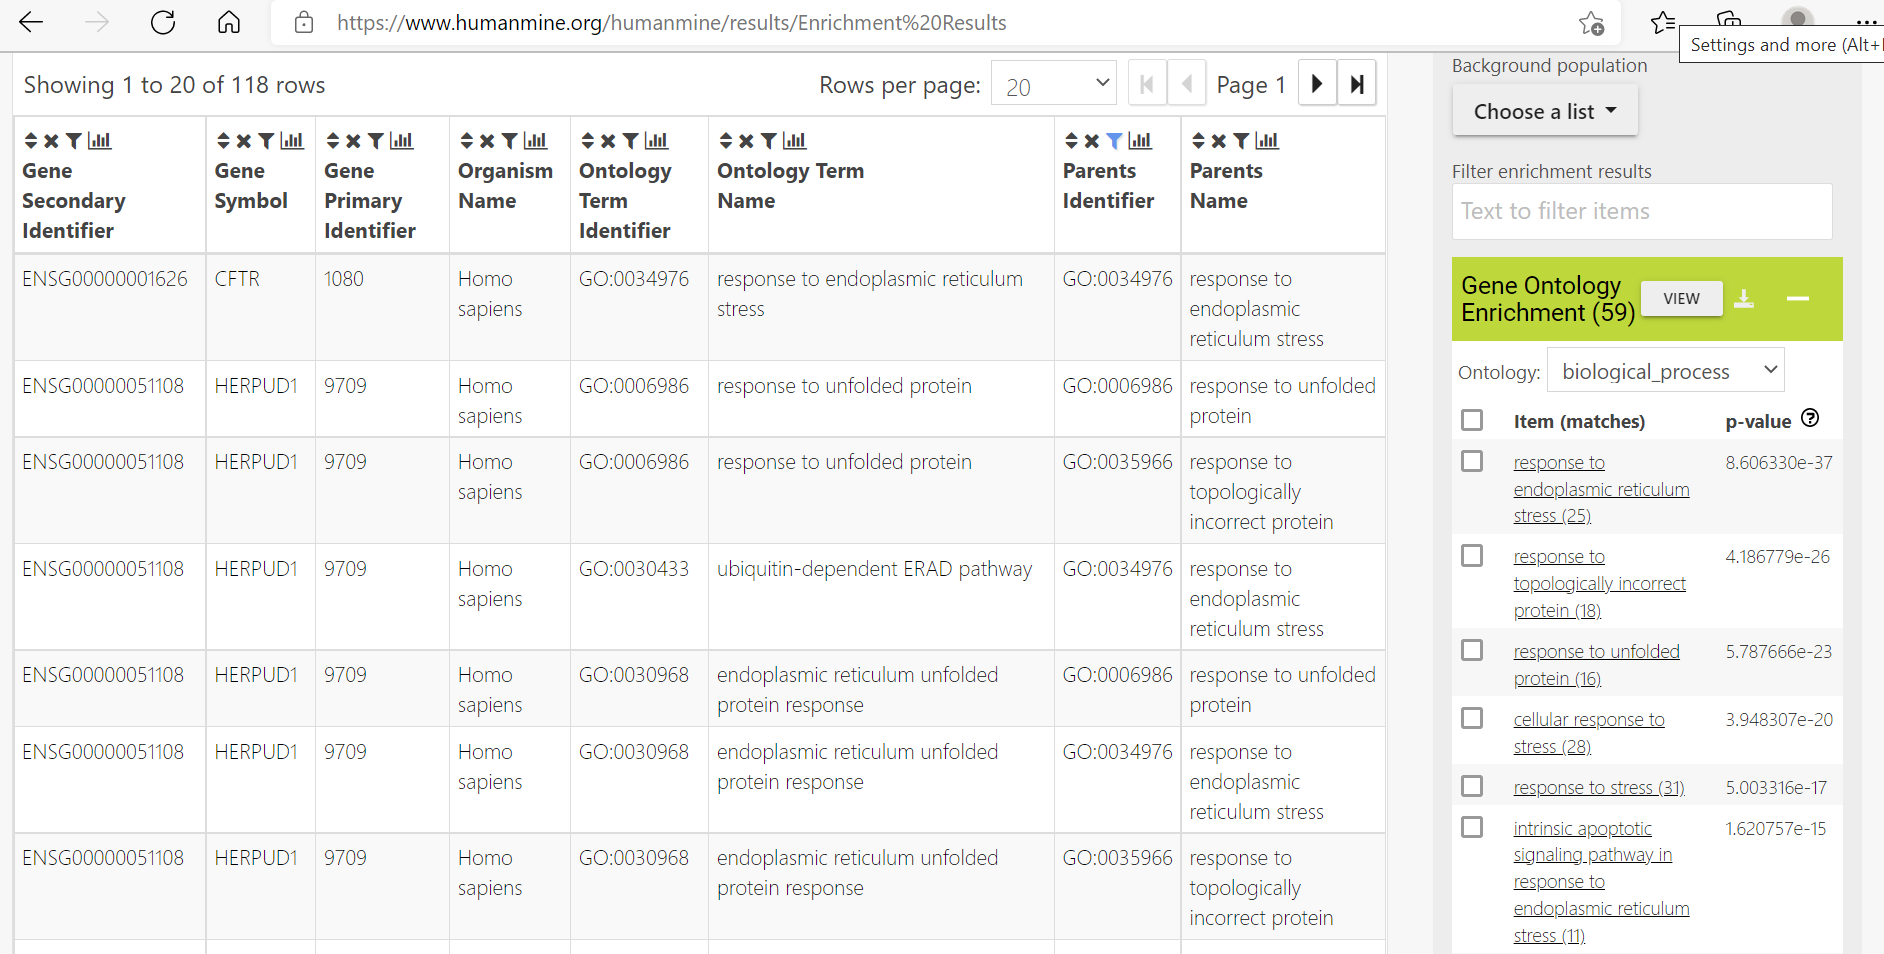

We learn interesting biological insights from the GO Enrichment tool. Indeed, many enriched GO terms refer to process involved in the proteic catabolic pathway, in the response to an endoplasmic reticulum stress and in the apopotic signaling pathway. Instead of looking at a screenshot from the Humanmine website, we can download a file containing the enriched GO terms having  a p-value < 0.05. 

We observe that many enriched GO terms are associated to catabolic or apoptotic process. It means that among the upregulated genes are a significant amount of genes that are known to be involved in the two latter processes. Thus, it indicates that the MB1 treatment seems to promote the breaking down of complex molecules and the programmed death of the cell. 

We don't learn much from the publication, the pathway and the protein domain enrichment. 

In [93]:
grep -n catabolic Humanmine_GOEnrichment.tsv
grep -c catabolic Humanmine_GOEnrichment.tsv

12:proteasome-mediated ubiquitin-dependent protein catabolic process	5.419434165486325e-11	1649,27248,3300,4189,51009,51439,51465,55284,57761,6400,7844,84447,9695,9709	GO:0043161
15:proteolysis involved in cellular protein catabolic process	4.996340113443463e-10	10013,1649,27248,3300,4189,51009,51439,51465,55284,5611,57761,6400,7844,84447,9695,9709	GO:0051603
16:proteasomal protein catabolic process	5.886700289103426e-10	1649,27248,3300,4189,51009,51439,51465,55284,57761,6400,7844,84447,9695,9709	GO:0010498
19:ubiquitin-dependent protein catabolic process	1.0494370254710489e-9	10013,1649,27248,3300,4189,51009,51439,51465,55284,57761,6400,7844,84447,9695,9709	GO:0006511
20:modification-dependent protein catabolic process	1.325068000091461e-9	10013,1649,27248,3300,4189,51009,51439,51465,55284,57761,6400,7844,84447,9695,9709	GO:0019941
21:cellular protein catabolic process	1.3951113214580858e-9	10013,1649,27248,3300,4189,51009,51439,51465,55284,5611,57761,6400,7844,84447,9695,9709	GO:0044

In [98]:
grep -n apoptotic Humanmine_GOEnrichment.tsv
grep -c apoptotic Humanmine_GOEnrichment.tsv

6:intrinsic apoptotic signaling pathway in response to endoplasmic reticulum stress	1.620757062484791e-15	1051,10525,1649,2081,23645,27113,57761,84447,8795,9451,9709	GO:0070059
26:intrinsic apoptotic signaling pathway	2.7948269523071634e-8	1051,10525,1649,2081,23645,27113,57761,84447,8795,9451,9709	GO:0097193
38:apoptotic signaling pathway	0.000035939980434941556	1051,10525,1649,2081,23645,27113,57761,84447,8795,9451,9709	GO:0097190
40:regulation of endoplasmic reticulum stress-induced intrinsic apoptotic signaling pathway	0.00006201305609587585	10525,1649,84447,9451,9709	GO:1902235
50:regulation of intrinsic apoptotic signaling pathway	0.006408497725149658	10525,1649,27113,84447,9451,9709	GO:2001242
5


In [100]:
grep -n 'unfolded\|incorrect' Humanmine_GOEnrichment.tsv #grep for the two words
grep -c 'unfolded\|incorrect' Humanmine_GOEnrichment.tsv

2:response to topologically incorrect protein	4.186779250912354e-26	10013,10133,11080,11153,153222,1649,2081,27248,3300,3338,4189,51009,55284,5611,64764,9451,9695,9709	GO:0035966
3:response to unfolded protein	5.787666379157027e-23	10133,11080,11153,153222,1649,2081,27248,3300,3338,4189,51009,5611,64764,9451,9695,9709	GO:0006986
10:endoplasmic reticulum unfolded protein response	6.67959811230761e-13	11153,1649,2081,23645,27248,4189,51009,64764,9451,9709	GO:0030968
11:cellular response to topologically incorrect protein	1.4801443299522435e-11	10013,10133,1649,2081,27248,51009,55284,64764,9451,9709	GO:0035967
24:cellular response to unfolded protein	1.3312762848533466e-8	10133,1649,2081,27248,51009,64764,9451,9709	GO:0034620
48:regulation of endoplasmic reticulum unfolded protein response	0.0028036955854851193	11153,2081,23645,4189	GO:1900101
6


## Use the entire ranking to determine the "leading edge"

### GORilla

Sort all genes descending or ascending by their logFC or padj; here we use logFC

In [66]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1}' | grep -v Gene | head #descending
cat deseq.results.tsv | sort -k 3,3g | awk '$3 != "NA" {print $1}' | grep -v Gene | head #ascending

TMEM86A
RP11-340F14.5
LMNA
LINC00304
ITIH2
PYHIN1
GBP6
RP11-326G21.1
AP000253.1
TEKT1
grep: write error: Broken pipe
sort: write failed: 'standard output': Broken pipe
sort: write error
EPHA1
SLAMF8
GPR141
RPL3L
CCL1
RP11-1149M10.2
AC007099.1
NCR2
CCR1
MIR553
grep: write error: Broken pipe
sort: write failed: 'standard output': Broken pipe
sort: write error


In [67]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCdesc.txt
cat deseq.results.tsv | sort -k3,3g | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCasc.txt

Let's chek for SESN1: 

In [4]:
grep -n SESN2 deseq.results.sortFCasc.txt 
grep -n SESN1 deseq.results.sortFCdesc.txt

16147:SESN2
4885:SESN1


Go to http://cbl-gorilla.cs.technion.ac.il/ and enter the text file with ranked gene names, then click on search for enriched GO terms:

### GSEA : Gene Set Enrichment Analysis

GSEA is often used for a ranking-based enrichment analysis. We will use a standalone version of GSEA, which you can download here: http://software.broadinstitute.org/gsea/index.jsp (click on Downloads; but you need to register first).

* GSEA firstly needs file with the ranked genes, as a .rnk file (just a text file with .rnk extension) with 2 columns: the gene name and the logFC value (the value can also be another type of score, here we use the logFC value).
* GSEA also needs a collection of gene lists, such as gene lists representing GO categories, pathways, etc. For human analyses, lots of collections are available from MSigDB. 
* You can also use your own collection of gene sets, then they need to be formatted in a .gmt file format, see https://software.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats
* In the GSEA software, we will use the GSEAPreranked function to test gene signatures against are preranked gene list (the .rnk file).
* An advantage of GSEA is that both the top of the ranking and the bottom will be tested (while GORilla only tests the top of the ranking; for the bottom we had to reverse the ranking)
* It is VERY important to use a ranking of ALL genes that were measured, not of a gene signature !



Let's first generate a .rnk file

In [101]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1, $3}' | grep -v Gene | head

TMEM86A 7.71102417006559
RP11-340F14.5 7.57019853652441
LMNA 7.02698399894497
LINC00304 6.92424247980959
ITIH2 6.84808768838167
PYHIN1 6.83188532090277
GBP6 6.80773884917355
RP11-326G21.1 6.71257749679054
AP000253.1 6.66253454380653
TEKT1 6.5439331978132
grep: write error: Broken pipe
sort: write failed: 'standard output': Broken pipe
sort: write error


In [102]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1, $3}' | grep -v Gene | tr ' ' '\t' > deseq.logFC.rnk

In [103]:
head deseq.logFC.rnk

TMEM86A	7.71102417006559
RP11-340F14.5	7.57019853652441
LMNA	7.02698399894497
LINC00304	6.92424247980959
ITIH2	6.84808768838167
PYHIN1	6.83188532090277
GBP6	6.80773884917355
RP11-326G21.1	6.71257749679054
AP000253.1	6.66253454380653
TEKT1	6.5439331978132


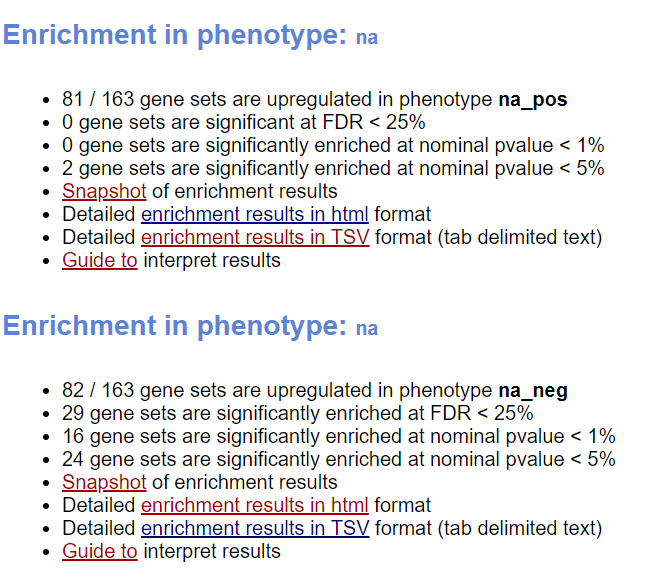

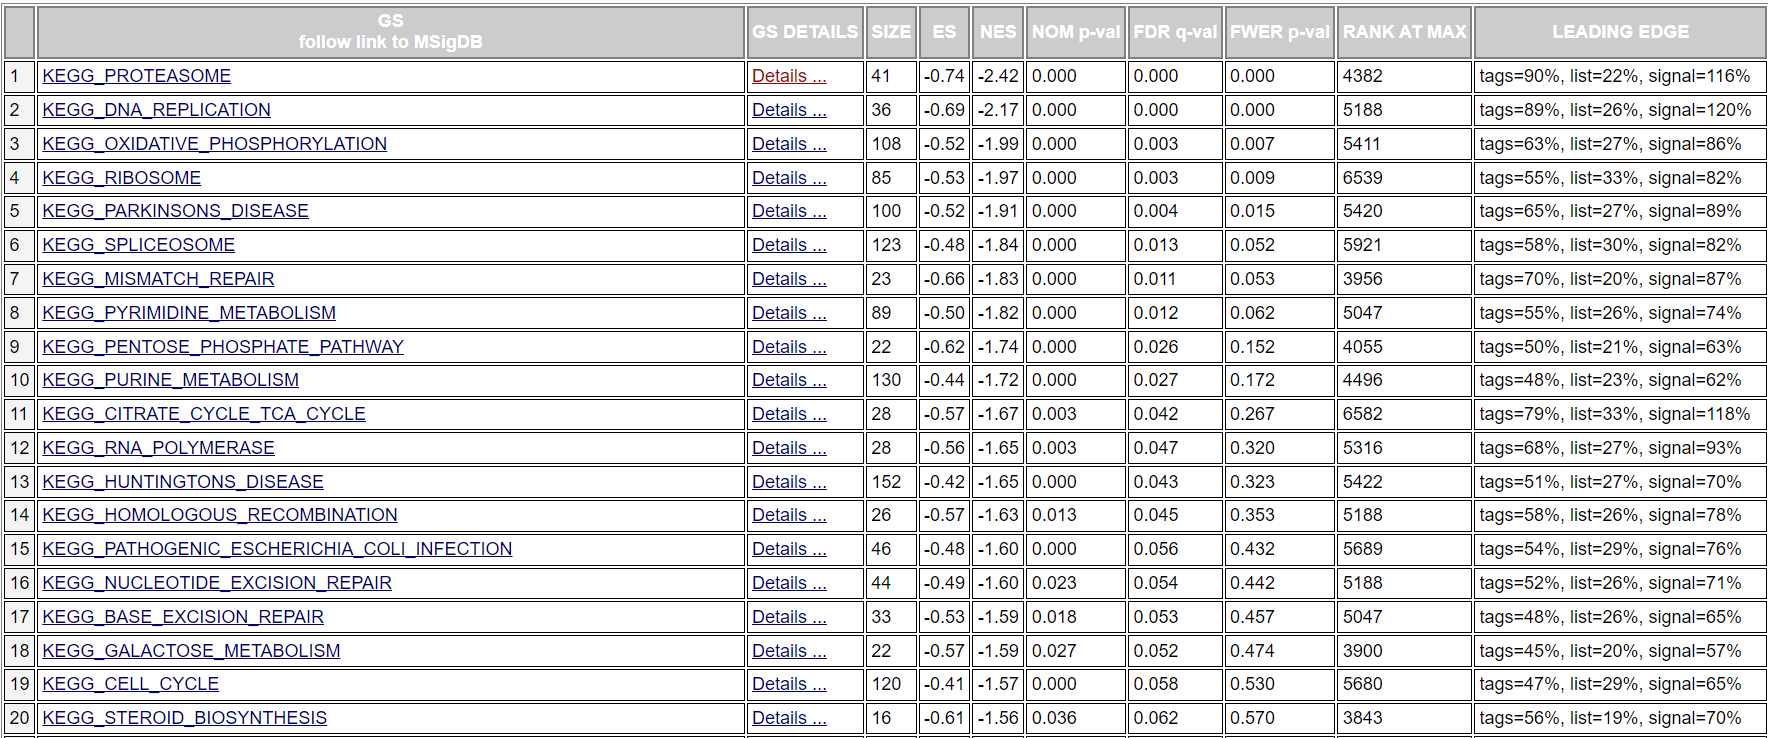

### Cytoscape & iRegulon

Refer to the master notebook for details about the output of iRegulon. 